# Week 1

This week I will:
Understand the data and how it is organised and loaded better.
Possibly attempt to identify a few key lines obvious in the spectra.
Create a single combined spectrum (median/average/weighted average)

P.Strom code used to modules/written functions in "calculations" (for use later on). As well as load the data.

In [1]:
import numpy as np
import json, sys, os

import matplotlib.pyplot as plt
from matplotlib import rc, cm

# Get the path of the current directory
path = os.getcwd()
home = os.path.dirname(path)

# Print the repository home directory
print("Repository home directory:",home)

# Add the src folder to the system path
sys.path.append(home+'/src')

# Import the python functions stored in the src folder
from calculations import Calc, Model, Stats

# We shorten the functions name to make it easier to call the required a functions
## 3 functions from P.Strom written code
c   = Calc()
m   = Model()
s   = Stats()

# Importing parameters from a json file.
# You can use this file to edit parameters later.

## Editing the paramenters in this way proves easier than writing it into the code 
with open(home+'/params.json') as param_file:    
   param = json.load(param_file)

# We read in the data directories we are using. To see what directories this is open params.json.
datadirs = param["datadirs"]

# Choose what part of the spectrum you wan to look at
# B is the blue end, whilst A is the red end)
part     = param["BetaPictoris"]["part"]

Repository home directory: C:\Users\Oliver\Documents\urss


In [2]:
## Creating and empty list (to later become a "nesting" array.)
D = []

print("Data used for this analysis:")

for i in sorted(datadirs):
    if param["filenames"]["split_files"] == 'yes':
        if datadirs[i][5:-1] in ["2017-04-23","2017-06-10","2017-08-04","2017-10-21","2017-11-26","2018-03-17","2018-05-09"]:
            print("\n",datadirs[i])
            D.append(c.GetData(param, home+'/'+datadirs[i]))
    else:
        print("\n",datadirs[i][5:-1])
        D.append(c.GetData(param, home+'/'+datadirs[i]))
    
# We save the data
if param["filenames"]["split_files"] == "yes":
    np.savez(home+'/data/D_'+part+'_split.npz', D, dtype=object)
else:
    np.savez(home+'/data/D_'+part+'.npz', D, dtype=object)

Data used for this analysis:

 2014-02-14
	AVM shift: 0.0" 	EXP: 2469s, 	Date: 2014-02-22, Time: 07:43:47 UTC

 2015-12-10
	AVM shift: 0.0" 	EXP: 2220s, 	Date: 2015-12-10, Time: 10:08:24 UTC
	AVM shift: -0.8" 	EXP: 504s, 	Date: 2015-12-10, Time: 11:36:28 UTC
	AVM shift: 0.8" 	EXP: 504s, 	Date: 2015-12-10, Time: 11:54:55 UTC

 2015-12-26
	AVM shift: 0.0" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:07:51 UTC
	AVM shift: -0.8" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:23:46 UTC
	AVM shift: 0.8" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:39:41 UTC
	AVM shift: 1.1" 	EXP: 218s, 	Date: 2015-12-26, Time: 01:36:06 UTC

 2016-01-30
	AVM shift: 0.0" 	EXP: 392s, 	Date: 2016-01-30, Time: 05:54:51 UTC
	AVM shift: -0.8" 	EXP: 392s, 	Date: 2016-01-30, Time: 06:10:46 UTC
	AVM shift: 0.8" 	EXP: 392s, 	Date: 2016-01-30, Time: 06:26:41 UTC
	AVM shift: 1.1" 	EXP: 218s, 	Date: 2016-01-30, Time: 07:22:55 UTC

 2017-04-23
	AVM shift: 0.0" 	EXP: 2104s, 	Date: 2017-04-22, Time: 23:36:06 UTC
	AVM shift: -1.25" 	EXP: 2657

C:\Users\Oliver\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [3]:
# Load the data into the multidimentional array D
if param["filenames"]["split_files"] == "yes":
    D = c.LoadData(home+'/data/D_'+part+'_split.npz')
else:
    D = c.LoadData(home+'/data/D_'+part+'.npz')

In [4]:
# Setting the parameters for the plots
## Had to change True -> False on bottom line as Latex not installed 
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': False}

plt.rcParams.update(plotting_params)

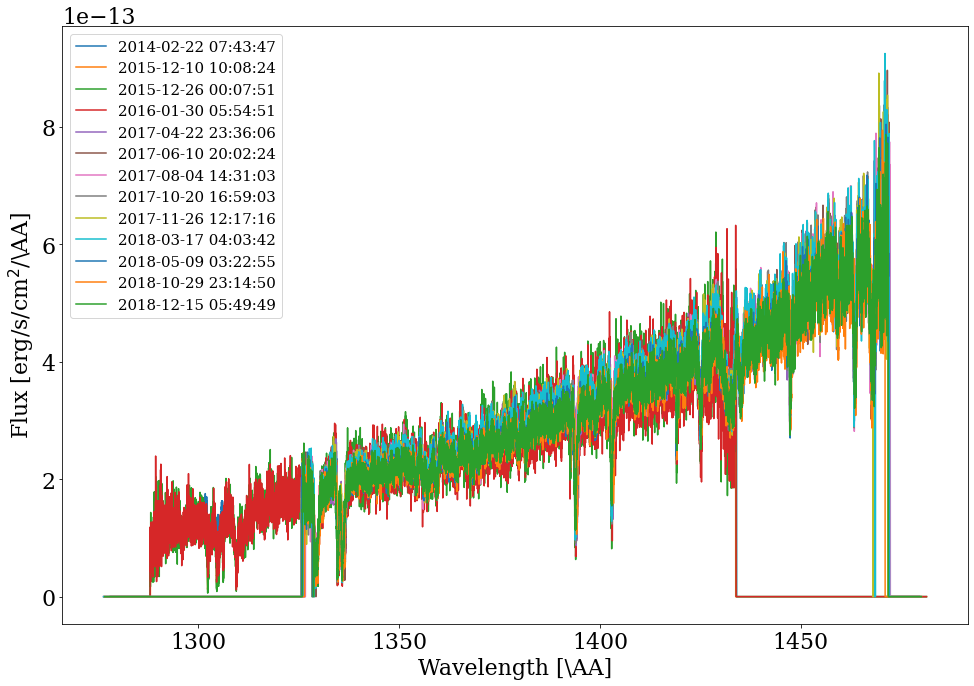

In [5]:
#Whole spectrum , focus wavelentghs changed in 2017 as longer wavelengths appeared to be more interesting
fig = plt.figure(figsize=(14.0,10.0))

for i in range(len(D)):
    plt.plot(D[i][0][0],D[i][0][1],label=D[i][0][3])

plt.legend(loc='upper left', numpoints=1 , fontsize=15)
plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()

(1390.0, 1400.0)

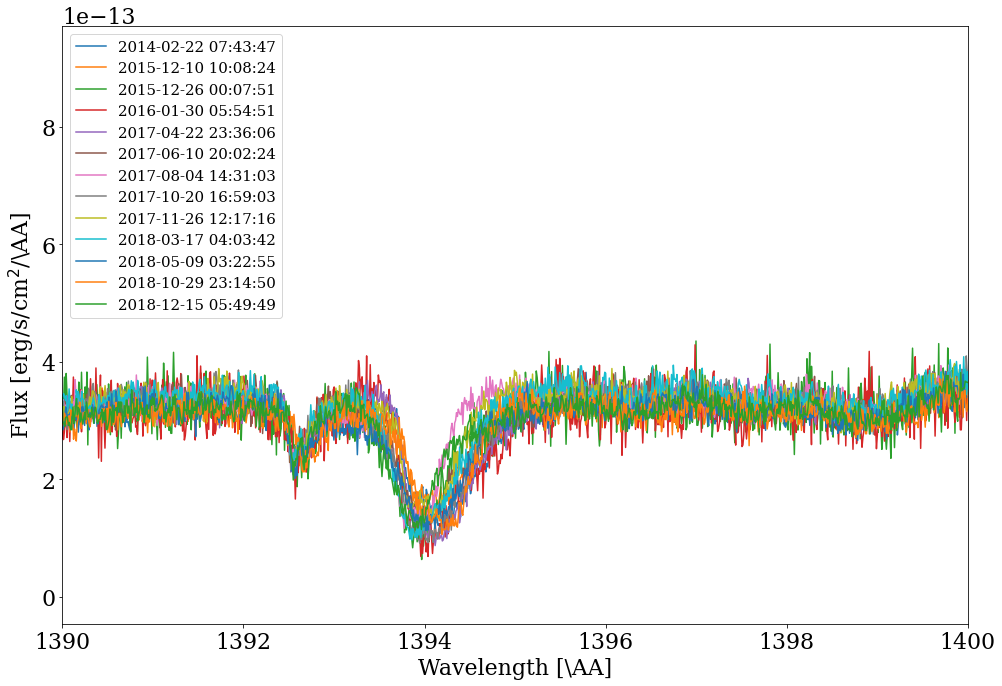

In [6]:
fig = plt.figure(figsize=(14.0,10.0))

for i in range(len(D)):
    plt.plot(D[i][0][0],D[i][0][1],label=D[i][0][3])

plt.legend(loc='upper left', numpoints=1, fontsize=15)
plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()
plt.xlim([1390,1400])

(1300.0, 1310.0)

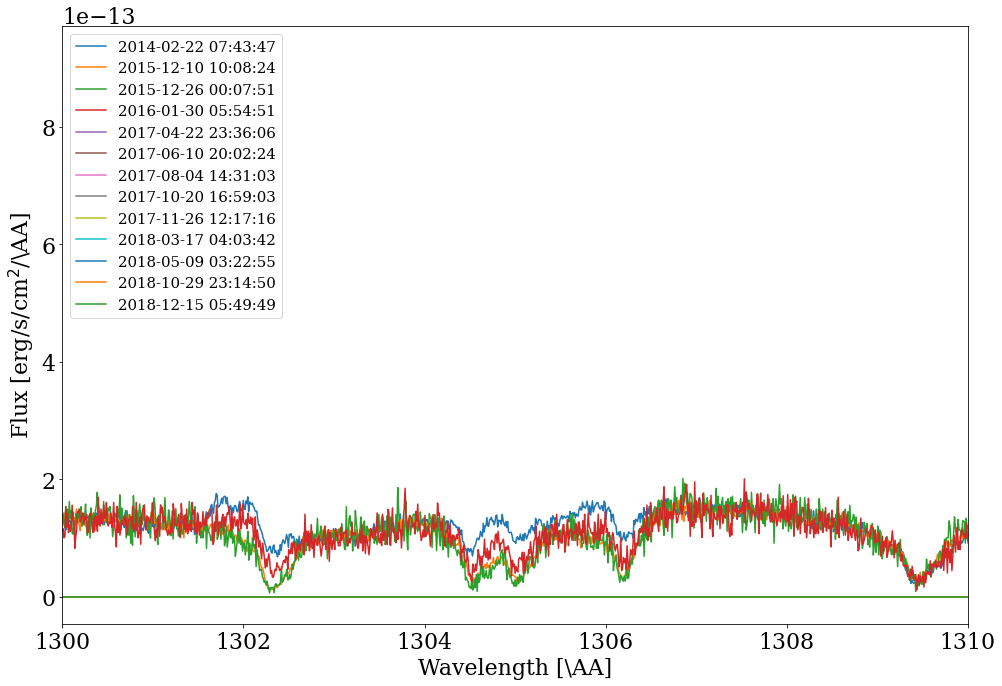

In [7]:
fig = plt.figure(figsize=(14.0,10.0))

for i in range(len(D)):
    plt.plot(D[i][0][0],D[i][0][1],label=D[i][0][3])

plt.legend(loc='upper left', numpoints=1, fontsize=15)
plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')
fig.tight_layout()
plt.xlim([1300,1310])

I spent a long time over the weekend fiddling with the code to understand it better and also located a few points of interest (immeditaely obvious absorption lines on the spectrum) and their approx. wavelengths.

In [8]:
WL = [1394,1392.5, 1334, 1336, 1329, 1403, 1425 ,1419.2 ,1309,1306, 1305 ,1304.5, 1302.5]
WL.sort()
print(WL)


[1302.5, 1304.5, 1305, 1306, 1309, 1329, 1334, 1336, 1392.5, 1394, 1403, 1419.2, 1425]


I decided to quickly calculate the redshift of B Pic to make some early estimations. From Wikipedia the Radial velocity = 20km/s which isnt really fast enough to have great effect on the wavelengths when working on this scale, however perhaps later in the project it will become more apparent. (from quick calculation less than a 0.01nm / 0.1Ang) 

1.0
0.9982822802730636
1.0087653492858195
0.9875419038769024
1.0186313042957167
1.031517859331703
1.0381217458888576
1.0356977801954326
1.0441902857963197
1.046776626017716
0.9888276337133304
0.972078037833719
0.9935578826603677

1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0


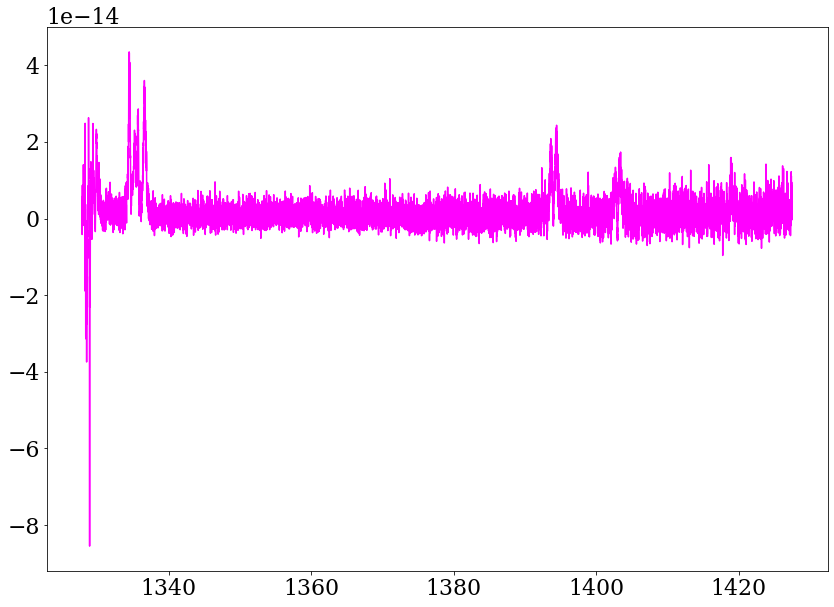

In [32]:
#%matplotlib widget

d0 = []
e0 = []

for i in range(len(D)): # Each visit
    for j in range(len(D[i])): # Within each visit (cycle over number of orbits)
        if j == 0: # If orbit == 0 (if orbit is the first one, then print)
            d0.append(D[i][j][1][5000:15000])
            e0.append(D[i][j][2][5000:15000])

            
# Convert list to array
d0 = np.array(d0)
e0 = np.array(e0)
w = D[0][0][0][5000:15000]

d0_n = []

for i in range(len(d0)):
    factor = np.median(d0[i])/np.median(d0[0])
    print(factor)
    d0_n.append(d0[i]/factor)

d0_n = np.array(d0_n)
print("")

for i in range(len(d0_n)):
    print(np.median(d0_n[i])/np.median(d0_n[0]))

fig = plt.figure(figsize=(14.0,10.0))


#for i in range(len(d0)):
#    plt.plot(w,d0[i])
    
#for i in range(len(d0_n)):
#   plt.plot(w,d0_n[i])

    
d0_ave = np.average(d0,axis=0)
#plt.plot(w ,d0_ave, color = "black")

d0_w_ave = np.average(d0 , axis = 0 , weights = 1/e0**2)
plt.plot(w , d0_ave-d0_w_ave , color = "magenta")
#plt.xlim(1375,1377)
#plt.ylim(2e-13,3e-13)
#plt.show()

In [10]:
##<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>
## D[visit_num][orbit_within_visit][0x,1y,2yerr,3time]
Averages = []
for i in range(len(D)):
    avg = np.average(D[i][0][0])
    print(avg)
    np.insert(Averages, avg)
    print(Averages)


1379.0767957300209


TypeError: _insert_dispatcher() missing 1 required positional argument: 'values'

In [ ]:
print(D[0][0][0])

In [ ]:
print(D)

In [ ]:
#Trying to figure out how np.stack works as I assume I need to collate all the y values into one array to then 
    
A = np.stack((D[0][0][0],D[0][0][1]))
B = np.stack((D[1][0][0],D[1][0][1]))
print("Here is A")
print(A)
print("Here is B")
print(B)

C = np.concatenate((A,B), axis = 0)
print("Here it is")
print(C)

In [ ]:
print(C[0][0])
print(C[1][0])

print(C[0][1])
print(C[1][1])

In [ ]:
x = np.stack((D[0][0][1],D[1][0][1]))
print(x)

In [ ]:
#Using hstack to make a list of all the y values, 
y = []
for i in range(len(D)):
    ys = np.hstack((D[i][0][1],D[i][0][1]))
    y.append(ys)
print(y)

In [ ]:
x = []
for i in range(len(D)):
    xs = np.hstack((D[i][0][0],D[i][0][0]))
    x.append(xs)
print(x)

In [ ]:
#This is understandable but shows that the two arrays I had just made were just renaming the D[i][0][0]
# and D[i][0][1] arrays 
# I still need to figure out the way to average over the y array
for i in range(len(D)):
    plt.plot(x[i],y[i])

In [ ]:
#This is just the complete average for each observation - not very useful 
yavgs = []
for i in range(len(D)):
    yavg = np.average(y[i])
    yavgs.append(yavg)
    
print(yavgs)

In [ ]:
#Another attempt at creating an array that can be averaged over (again seeming just rewritting the orignal in a different way)
DD = [x,y]
print(DD)

In [ ]:
for i in range(len(DD)):
    plt.plot(DD[i][i],DD[i][i])